# Lecture practicals

## Week 3
Extend lecture 1 & 2 exercises with stationarity analysis: are the time series stationary?
- Visual inspection
- Statistical tests

Make the time series stationary
- Experiment with non-linear transformations.
- Experiment with decomposition.
- Experiment with differencing.

Explore artificial auto-correlations induced by differencing
- Start with a stationary time series.
- Apply differencing at various order.
- Compare ACF.

In [3]:
import pandas as pd
import numpy as np
# Week 1 series
df = pd.read_parquet("basel-energy-demand.parquet")

# Week 2 series
np.random.seed(42)

# Generate synthetic time series data with known components
n = 365 * 2
t = np.arange(n)

# Series 1: Linear trend + Single seasonality + Noise
trend1 = 0.05 * t
seasonality1 = 10 * np.sin(2 * np.pi * t / (365 / 4))  # Quartertly seasonality
noise1 = np.random.normal(0, 1, n)
# Combined series
series1 = trend1 + seasonality1 + noise1
series1_components = {'trend': trend1, 'seasonal': seasonality1, 'residual': noise1}

# Series 2: Non-linear trend + Multiple seasonality + Noise
trend2 = 30 * np.log(0.05 * t + 1)
seasonality2 = 8 * np.sin(2 * np.pi * t / 365) + 4 * np.sin(2 * np.pi * t / 7)  # Annual + Weekly
noise2 = np.random.normal(0, 1.5, n)
# Combined series
series2 = trend2 + seasonality2 + noise2
series2_components = {'trend': trend2, 'seasonal': seasonality2, 'residual': noise2}

# Create DataFrames for the time series
dates = pd.date_range(start='2020-01-01', periods=n, freq='D')
synthetic_df = pd.DataFrame({
    'date': dates,
    'series1': series1,
    'series2': series2,
})

Extend lecture 1 & 2 exercises with stationarity analysis: are the time series stationary?
- Visual inspection
- Statistical tests

Testing stationarity for Synthetic Series 1


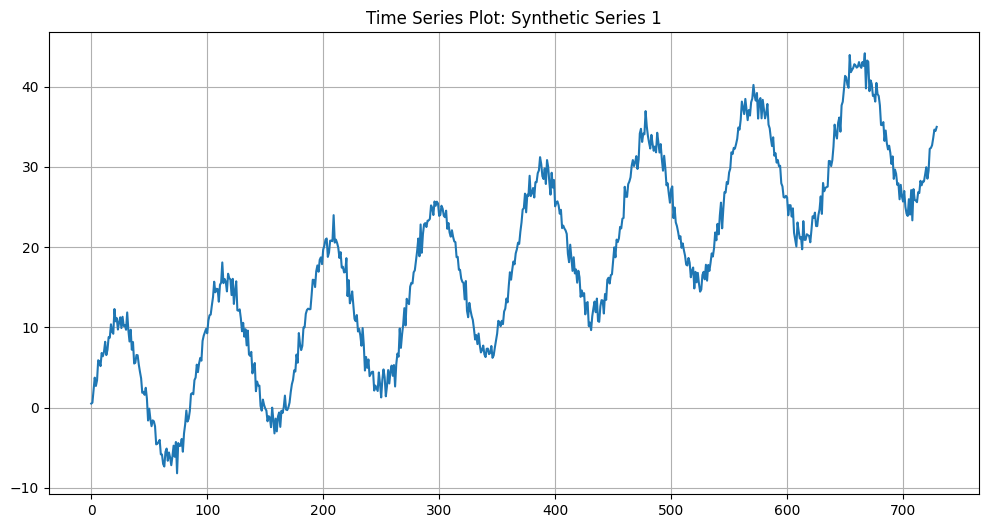

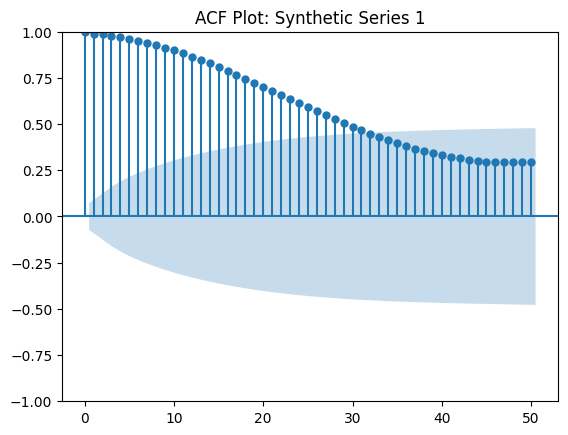

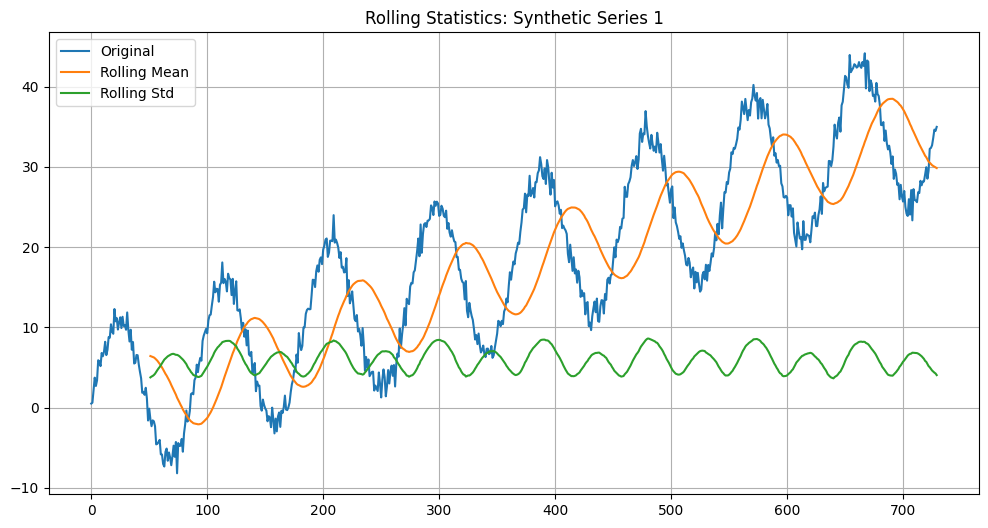

Augmented Dickey-Fuller Test:
ADF Statistic: -2.3412
p-value: 0.1590
Critical Values:
	1%: -3.4396
	5%: -2.8656
	10%: -2.5689
Conclusion: Series is NON-STATIONARY (fail to reject H0)

KPSS Test:
KPSS Statistic: 2.8970
p-value: 0.0100
Critical Values:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390
Conclusion: Series is NON-STATIONARY (reject H0)


Testing stationarity for Synthetic Series 2


/tmp/ipykernel_18718/453993163.py:53: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c')


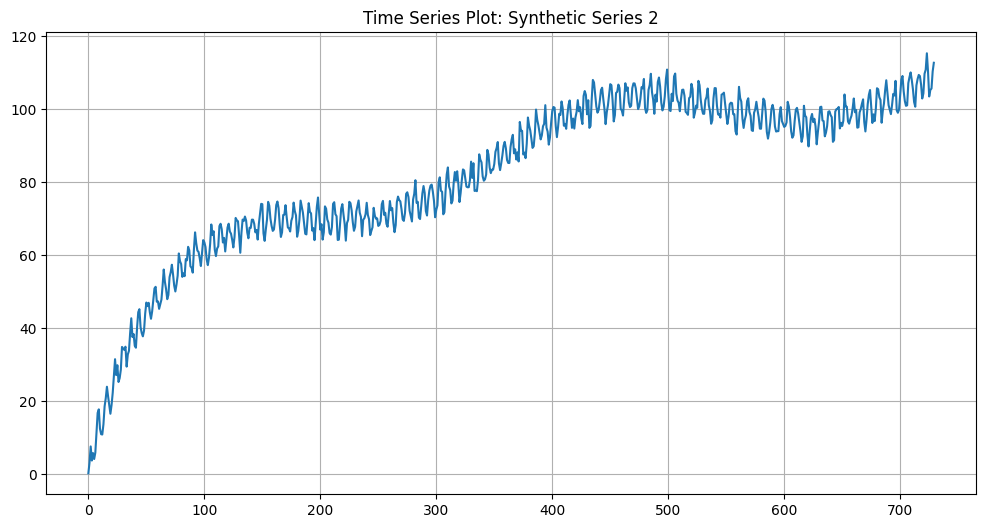

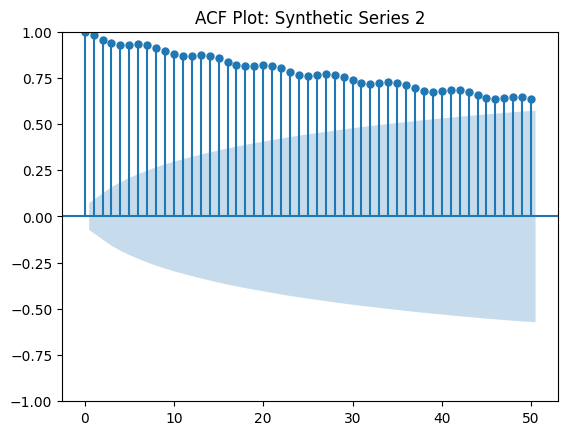

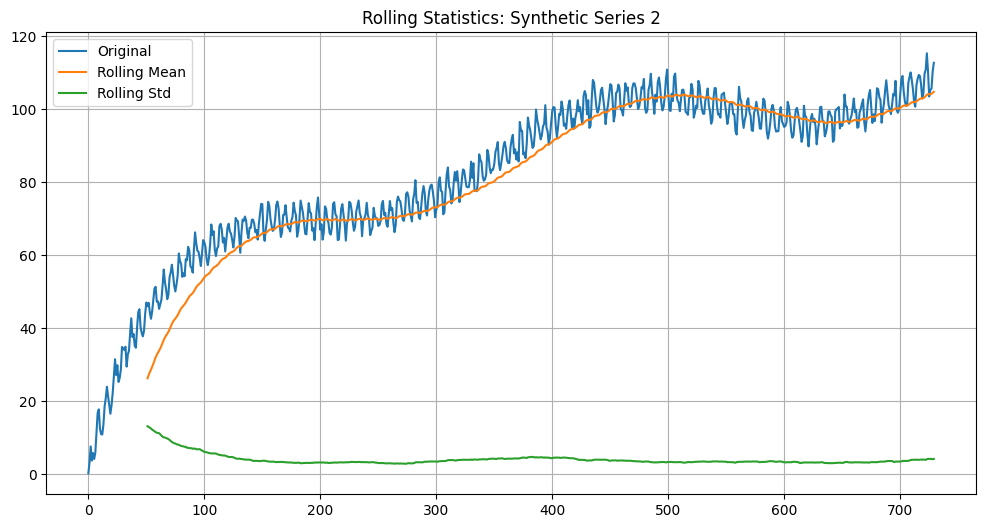

Augmented Dickey-Fuller Test:
ADF Statistic: -2.2979
p-value: 0.1726
Critical Values:
	1%: -3.4396
	5%: -2.8656
	10%: -2.5689
Conclusion: Series is NON-STATIONARY (fail to reject H0)

KPSS Test:
KPSS Statistic: 3.4867
p-value: 0.0100
Critical Values:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390
Conclusion: Series is NON-STATIONARY (reject H0)


Testing stationarity for Basel Energy Demand


/tmp/ipykernel_18718/453993163.py:53: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c')


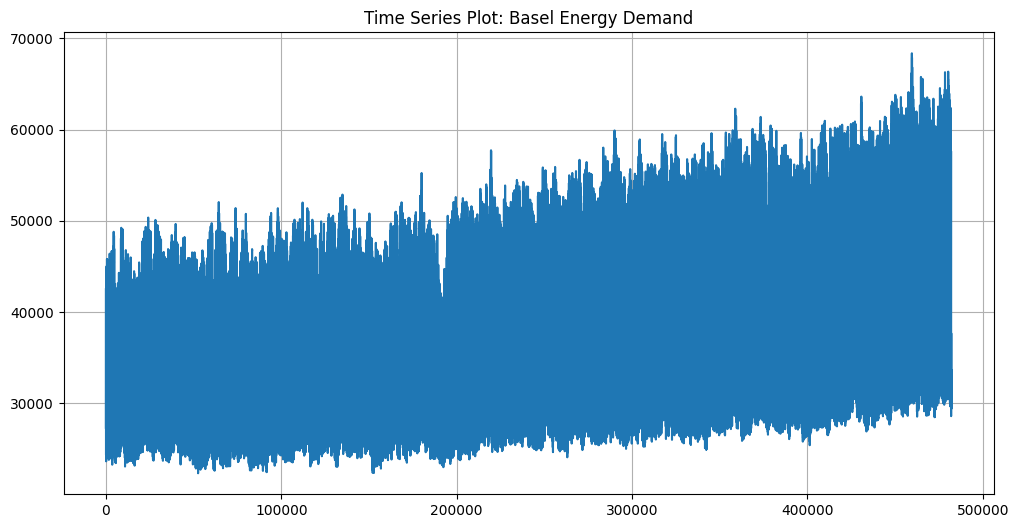

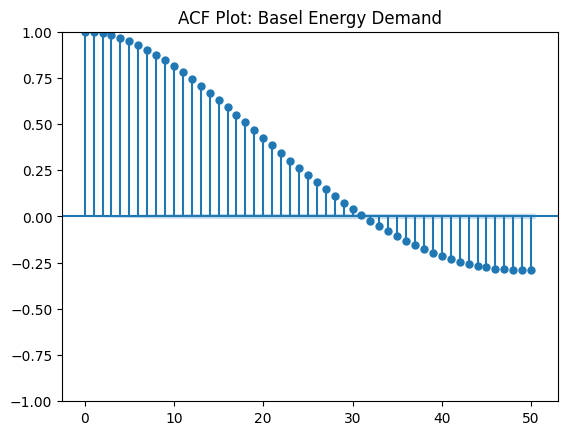

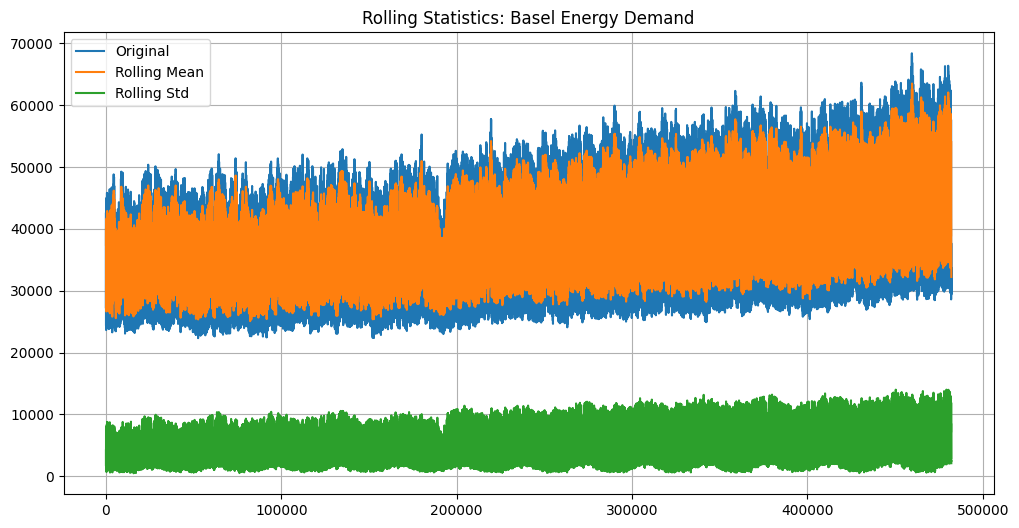

Augmented Dickey-Fuller Test:
ADF Statistic: -41.2045
p-value: 0.0000
Critical Values:
	1%: -3.4304
	5%: -2.8615
	10%: -2.5668
Conclusion: Series is STATIONARY (reject H0)

KPSS Test:
KPSS Statistic: 83.7343
p-value: 0.0100
Critical Values:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390
Conclusion: Series is NON-STATIONARY (reject H0)




/tmp/ipykernel_18718/453993163.py:53: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c')


In [5]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import STL

import matplotlib.pyplot as plt

# Function to test stationarity
def test_stationarity(series, series_name):
    print(f"Testing stationarity for {series_name}")
    
    # Plot the series
    plt.figure(figsize=(12, 6))
    plt.plot(series)
    plt.title(f"Time Series Plot: {series_name}")
    plt.grid(True)
    plt.show()

    # Plot ACF
    plot_acf(series, lags=50)
    plt.title(f'ACF Plot: {series_name}')
    plt.show()
    
    # Rolling statistics
    rolling_mean = pd.Series(series).rolling(window=52).mean()
    rolling_std = pd.Series(series).rolling(window=52).std()
    
    plt.figure(figsize=(12, 6))
    plt.plot(series, label='Original')
    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(rolling_std, label='Rolling Std')
    plt.title(f'Rolling Statistics: {series_name}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Augmented Dickey-Fuller test
    print("Augmented Dickey-Fuller Test:")
    adf_result = adfuller(series, autolag='AIC')
    
    print(f'ADF Statistic: {adf_result[0]:.4f}')
    print(f'p-value: {adf_result[1]:.4f}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print(f'\t{key}: {value:.4f}')
    
    if adf_result[1] <= 0.05:
        print("Conclusion: Series is STATIONARY (reject H0)")
    else:
        print("Conclusion: Series is NON-STATIONARY (fail to reject H0)")
    
    # KPSS test
    print("\nKPSS Test:")
    kpss_result = kpss(series, regression='c')
    
    print(f'KPSS Statistic: {kpss_result[0]:.4f}')
    print(f'p-value: {kpss_result[1]:.4f}')
    print('Critical Values:')
    for key, value in kpss_result[3].items():
        print(f'\t{key}: {value:.4f}')
    
    if kpss_result[1] <= 0.05:
        print("Conclusion: Series is NON-STATIONARY (reject H0)")
    else:
        print("Conclusion: Series is STATIONARY (fail to reject H0)")
    
    print("\n")

# Test stationarity for synthetic series
test_stationarity(series1, "Synthetic Series 1")
test_stationarity(series2, "Synthetic Series 2")

# Test stationarity for real-world energy demand
test_stationarity(df['stromverbrauch_kwh'].values, "Basel Energy Demand")

Visual inspection
- All series are non stationary due to various features.
- 1 has both trend and seasonality
- 2 has a trend
- 3 has both trend and seasonality

Therefore none of them are stationary

Statistical tests
1.
- ADF: Did not reject null hypothesis -> non stationary evidence
- KPSS: Rejected the null hypthesis -> non stationary evidence
2.
- ADF: Did not reject null hypothesis -> non stationary evidence
- KPSS: Rejected the null hypthesis -> non stationary evidence
3.
- ADF: Rejected null hypothesis -> stationary evidence
- KPSS: Rejected the null hypthesis -> non stationary evidence

All series dont have a structural break 

Therefore all series are non stationary

Make the time series stationary
- Experiment with non-linear transformations.
- Experiment with decomposition.
- Experiment with differencing.


Non-linear Transformations for Series 2:


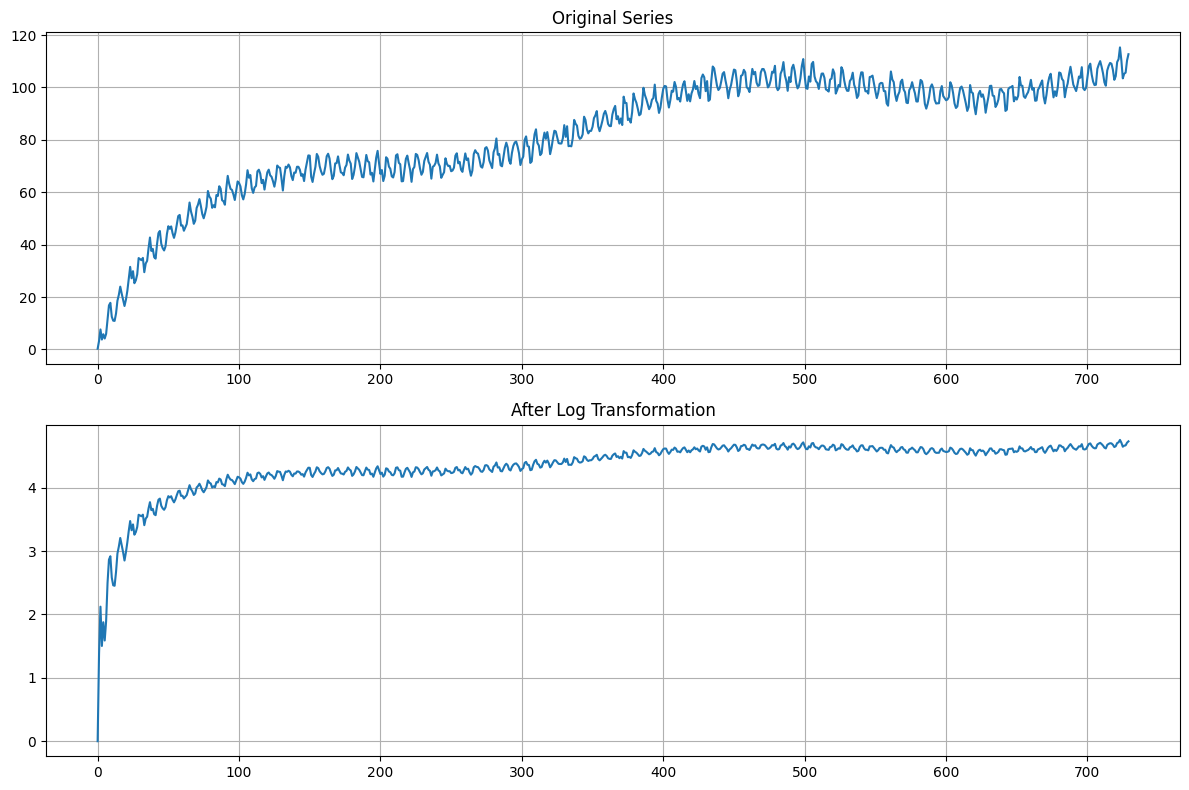

Log Transformation - ADF p-value: 0.0898
Log Transformation - KPSS p-value: 0.0100


/tmp/ipykernel_18718/3875656788.py:23: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(transformed, regression='c')


<Figure size 1200x400 with 0 Axes>

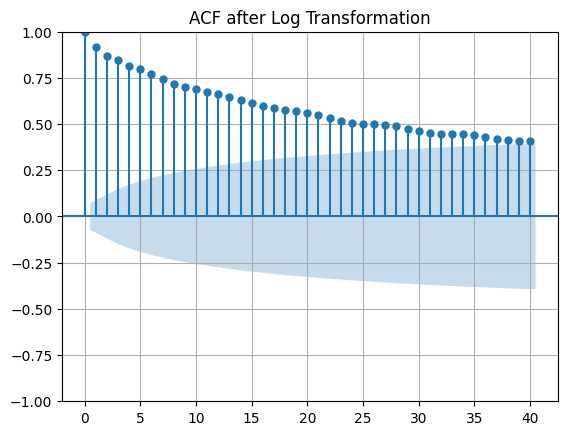

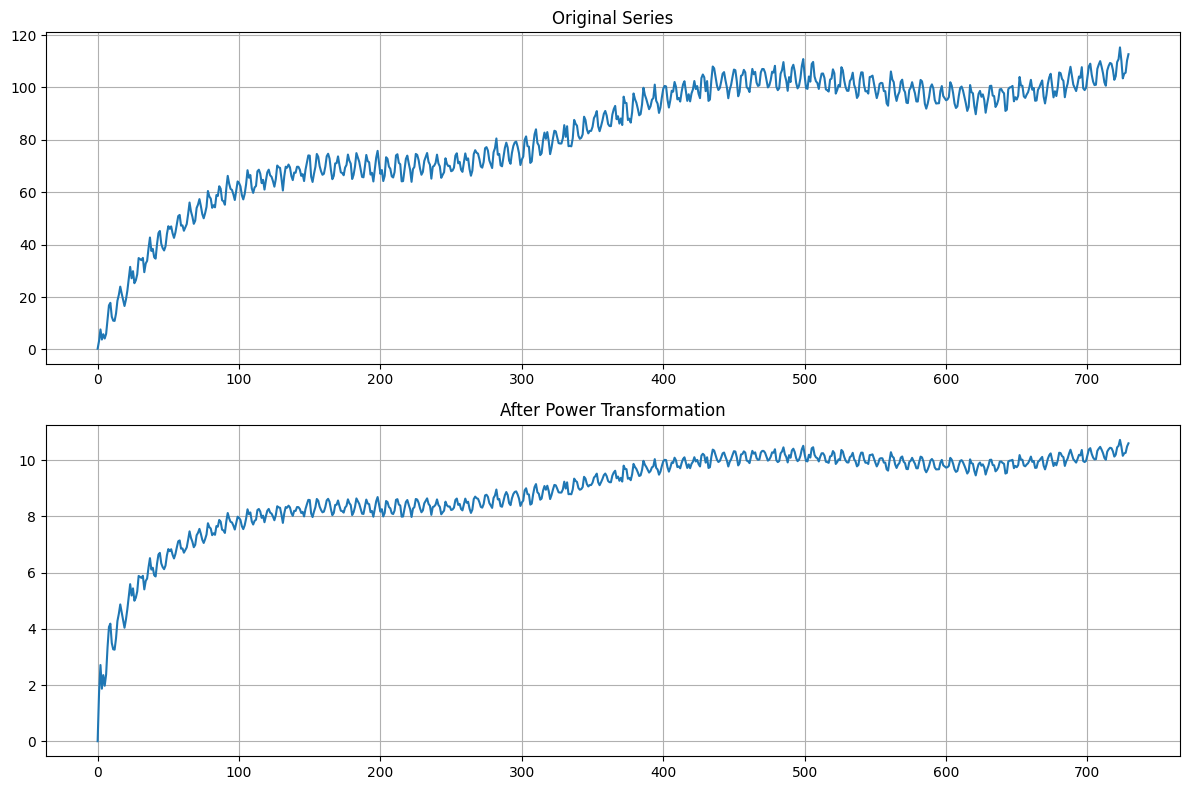

Power Transformation - ADF p-value: 0.1595
Power Transformation - KPSS p-value: 0.0100


/tmp/ipykernel_18718/3875656788.py:23: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(transformed, regression='c')


<Figure size 1200x400 with 0 Axes>

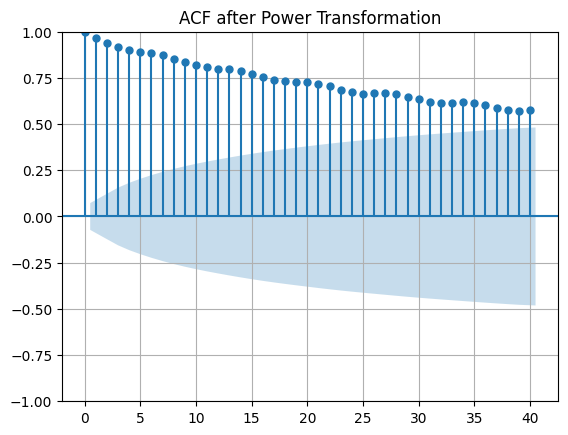


Decomposition Method for Series 2:


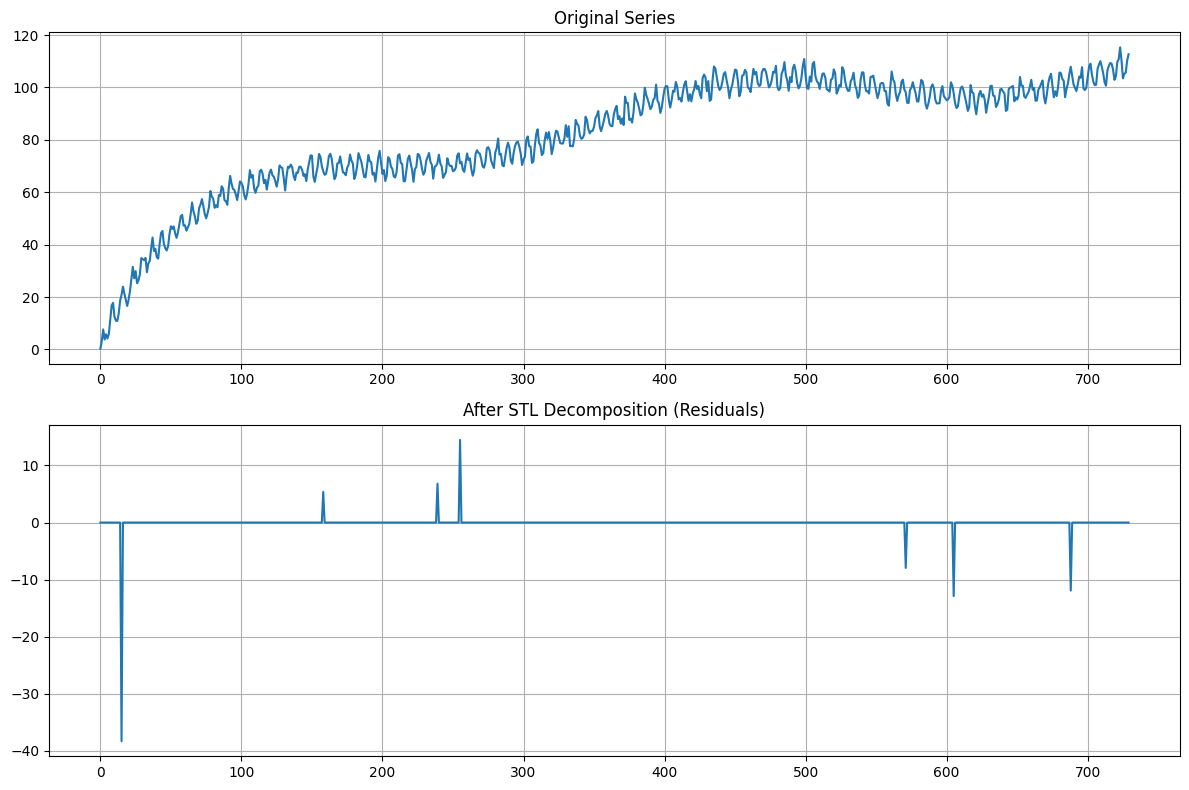

STL Decomposition (Residuals) - ADF p-value: 0.0000
STL Decomposition (Residuals) - KPSS p-value: 0.1000


/tmp/ipykernel_18718/3875656788.py:23: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(transformed, regression='c')


<Figure size 1200x400 with 0 Axes>

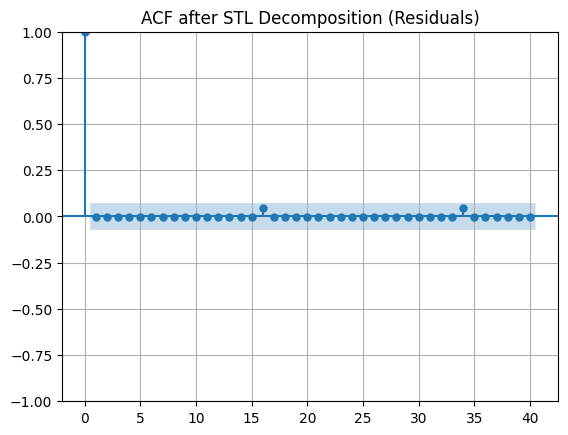


Differencing Methods:


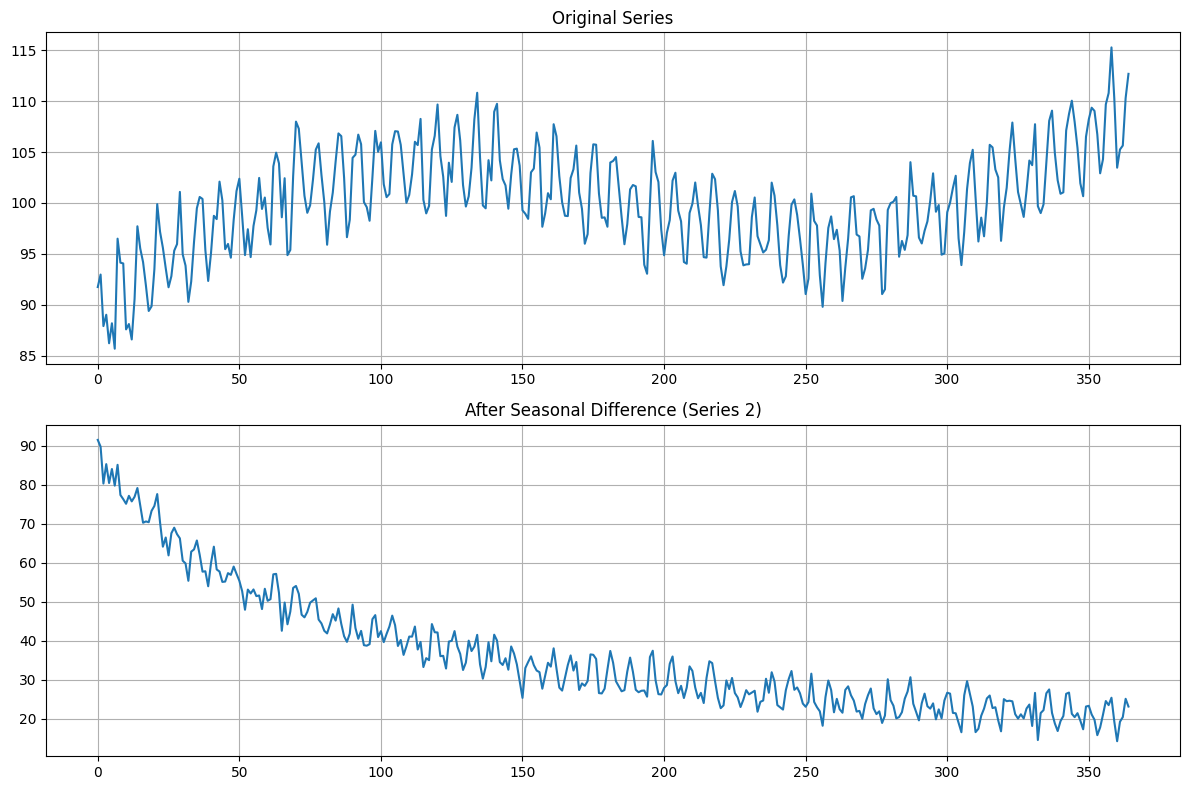

Seasonal Difference (Series 2) - ADF p-value: 0.0000
Seasonal Difference (Series 2) - KPSS p-value: 0.0100


/tmp/ipykernel_18718/3875656788.py:23: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(transformed, regression='c')


<Figure size 1200x400 with 0 Axes>

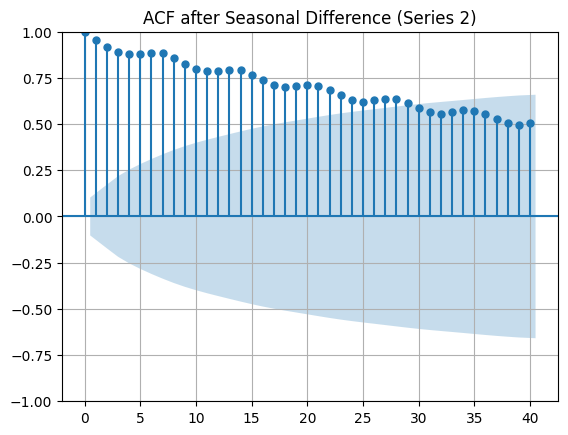

In [9]:
def check_transformation(original, transformed, transform_name):
    plt.figure(figsize=(12, 8))
    
    # Original series
    plt.subplot(2, 1, 1)
    plt.plot(original)
    plt.title('Original Series')
    plt.grid(True)
    
    # Transformed series
    plt.subplot(2, 1, 2)
    plt.plot(transformed)
    plt.title(f'After {transform_name}')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Test stationarity of transformed series
    adf_result = adfuller(transformed, autolag='AIC')
    print(f"{transform_name} - ADF p-value: {adf_result[1]:.4f}")
    
    kpss_result = kpss(transformed, regression='c')
    print(f"{transform_name} - KPSS p-value: {kpss_result[1]:.4f}")
    
    # ACF plot
    plt.figure(figsize=(12, 4))
    plot_acf(transformed, lags=40, title=f'ACF after {transform_name}')
    plt.grid(True)
    plt.show()

# A. Non-linear transformations
# Using series2 which has a non-linear trend
print("\nNon-linear Transformations for Series 2:")
# Log transformation (long right tail)
log_transform = np.log(series2 - np.min(series2) + 1)
check_transformation(series2, log_transform, "Log Transformation")
# power transform
power_transform = np.power(series2 - np.min(series2), 0.5)
check_transformation(series2, power_transform, "Power Transformation")

# B. Using decomposition (removing trend and seasonality)
print("\nDecomposition Method for Series 2:")
# Get residuals from STL decomposition
stl = STL(series2, period=365, robust=True)
result = stl.fit()
residuals = result.resid
check_transformation(series2, residuals, "STL Decomposition (Residuals)")

# C. Differencing
print("\nDifferencing Methods:")
# Seasonal differencing for Series 2 (period=365)
seasonal_diff_s2 = series2[365:] - series2[:-365]
check_transformation(series2[365:], seasonal_diff_s2, "Seasonal Difference (Series 2)")


Apply various techniques to series 2

Log transform
- Works well with the long right tail 
Power transform
- No large values, therefore no large impact
STL 
- The leftover residuals are nearly 0, which is stationary
Seasonal Differencing
- Series 2 mostly has a seasonal component, after the seasonal differncing a downtrend is in the residual

Explore artificial auto-correlations induced by differencing
- Start with a stationary time series.
- Apply differencing at various order.
- Compare ACF.

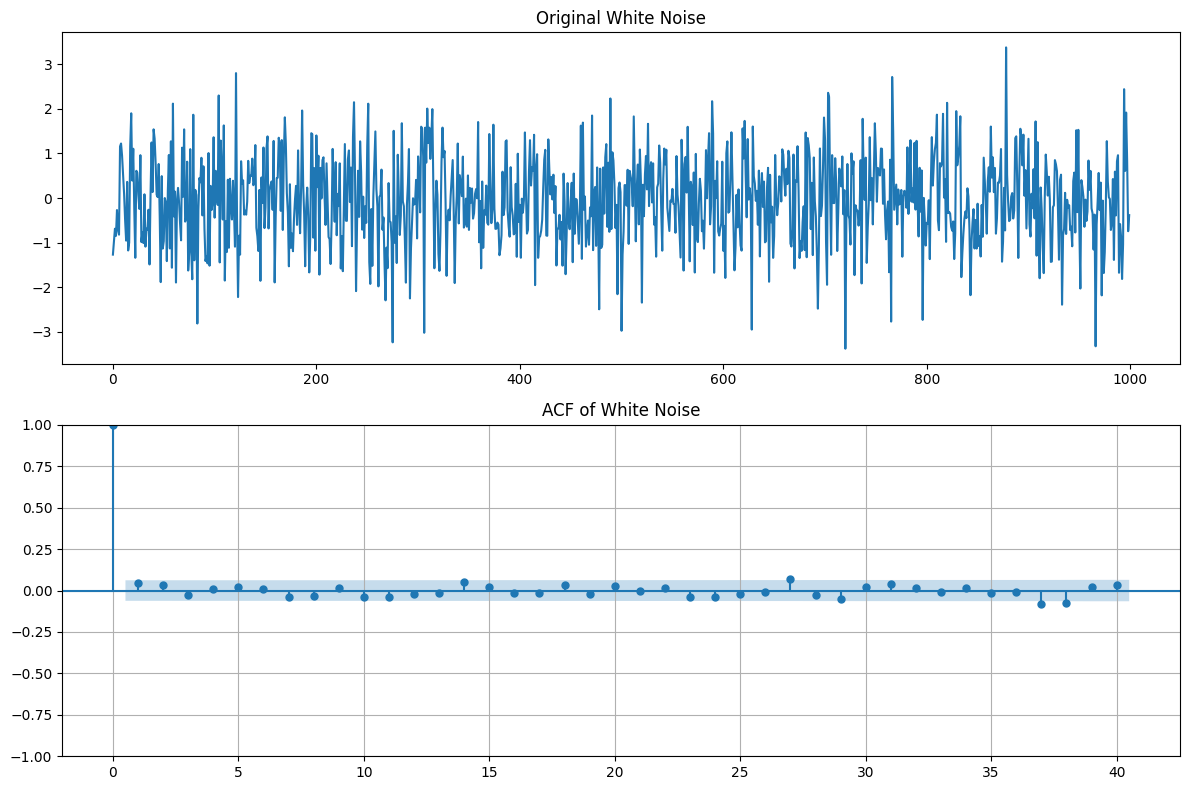

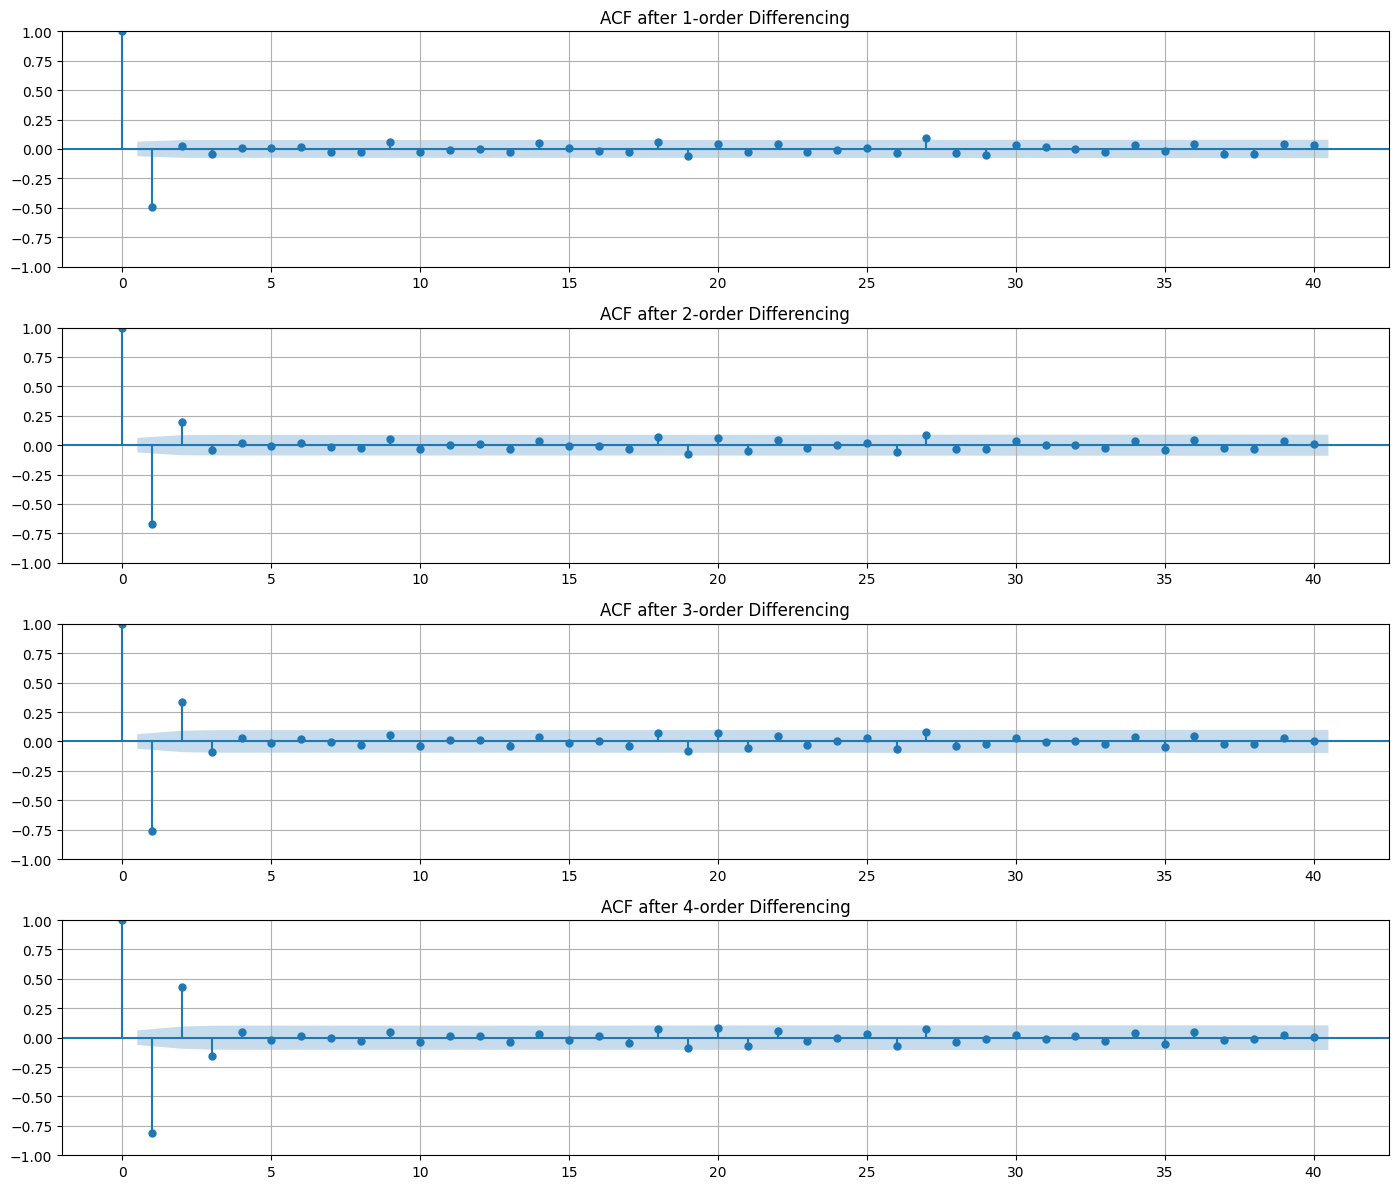

In [19]:
# Generate white noise (stationary series)
n_samples = 1000
white_noise = np.random.normal(0, 1, n_samples)

# Apply differencing of various orders
diff_orders = [1, 2, 3, 4]
diff_series = []

for d in diff_orders:
    if d == 1:
        diff = np.diff(white_noise)
    else:
        diff = np.diff(white_noise, n=d)
    diff_series.append(diff)

# Plot the original white noise and its ACF
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(white_noise)
plt.title('Original White Noise')
plt.subplot(2, 1, 2)
plot_acf(white_noise, lags=40, ax=plt.gca(), title='ACF of White Noise')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the differenced series and their ACFs
fig, axes = plt.subplots(len(diff_orders), 1, figsize=(14, 3*len(diff_orders)))

for i, d in enumerate(diff_orders):
    # Plot the differenced series
    # axes[i, 0].plot(diff_series[i])
    # axes[i, 0].set_title(f'White Noise after {d}-order Differencing')
    # axes[i, 0].grid(True)
    
    # Plot the ACF
    plot_acf(diff_series[i], lags=40, ax=axes[i], title=f'ACF after {d}-order Differencing')
    axes[i].grid(True)

plt.tight_layout()
plt.show()


Artificial auto-correlations:
- The higher order differencing introduces stronger artifical auto correlations.
- It is noticiable in the first order at only the first lag.
- The higher the order the larger are the artifical auto correlatons, therefore the first lag difference is larger and subsequent lags are also affected more